## Import libaries

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs

## Loading data from csv file

In [2]:
dataframe = pd.read_csv('customer.csv')
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
dataframe.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

dataframe = dataframe.drop_duplicates()

dataframe = dataframe.dropna()

label_encoder = LabelEncoder()

dataframe["Gender"] = label_encoder.fit_transform(dataframe["Gender"])
# Male == 1
# Female == 0

In [6]:
clus_dataframe = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clus_dataframe

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Modeling: K Means Clustring

### Find the number of clusters

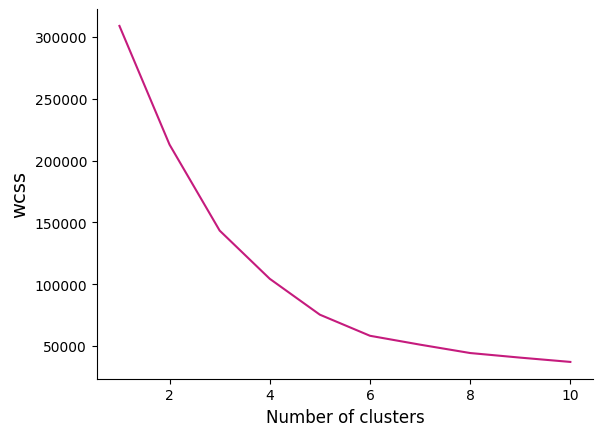

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(clus_dataframe)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters= 5, init='k-means++')

In [9]:
y_kmeans = k_means.fit_predict(clus_dataframe)
y_kmeans

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [10]:
labels = k_means.labels_
labels

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [11]:
dataframe['Clus_km'] = labels
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,2
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2


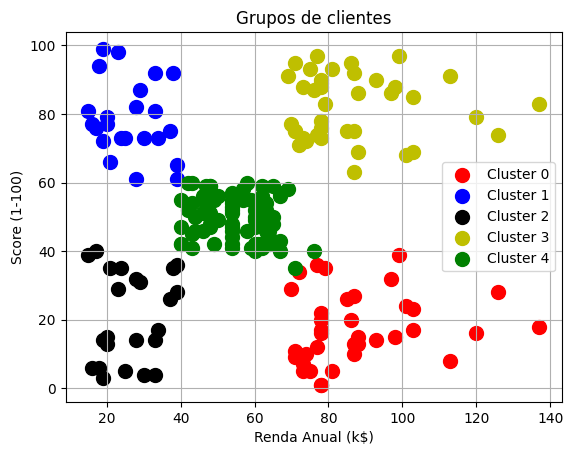

In [12]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = clus_dataframe[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()

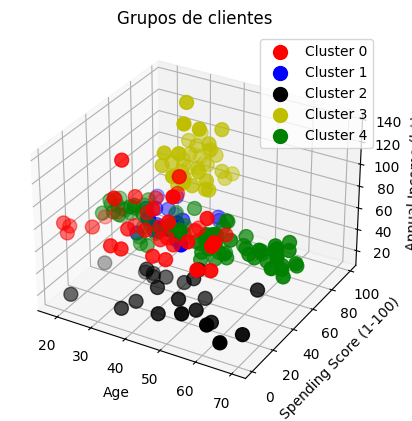

In [13]:
from mpl_toolkits.mplot3d import Axes3D

k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for k in range(k_grupos):
    cluster = clus_dataframe[y_kmeans == k]
    ax.scatter(cluster['Age'], cluster['Spending Score (1-100)'], cluster['Annual Income (k$)'],
                s=100, c=cores[k], label=f'Cluster {k}')

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('Grupos de clientes')

plt.legend()
plt.show()

## Modeling: Hierarchical Clustering

### Normalizing

In [14]:
featureset = dataframe[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
from sklearn.preprocessing import MinMaxScaler

x = clus_dataframe.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

### Clustring with Scipy

In [16]:
import scipy

leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

D

C:\Users\pc\AppData\Local\Temp\ipykernel_15608\2824094358.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


array([[0.        , 0.43029381, 0.33738296, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 0.76559158, ..., 0.93683095, 1.20748243,
        1.01507247],
       [0.33738296, 0.76559158, 0.        , ..., 1.16089362, 1.02563246,
        1.27984489],
       ...,
       [1.00888686, 0.93683095, 1.16089362, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.02563246, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.27984489, ..., 0.13432353, 0.66437953,
        0.        ]])

In [17]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\pc\AppData\Local\Temp\ipykernel_15608\3038220216.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [18]:
from scipy.cluster.hierarchy import fcluster

max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 4, 18,  4, 19, 10, 19,  4, 18,  1, 19,  1, 18,  1, 19,  4, 19, 10,
       19, 12, 18, 10, 19,  1, 19,  1, 19, 12, 10, 12, 18,  1, 19,  1, 18,
       12, 18, 12, 19, 12, 19,  2, 18, 12, 10, 12, 19, 13, 10, 10, 10, 13,
       10, 10,  2, 13, 13, 13,  2, 10, 13,  2,  9,  2, 13,  2,  9, 13,  2,
        9,  8,  2, 13,  2,  2,  2,  9, 13,  8,  9, 13,  2,  8,  2, 13,  9,
       13, 13,  9,  8, 13,  2,  9, 13,  8,  8,  9, 13,  9, 13,  9,  9, 13,
        2,  9, 13,  9,  2, 14,  2,  2,  2,  9,  8,  9,  9,  9,  2, 13, 14,
       13,  9,  8,  8, 17, 11, 17, 14, 17,  6, 17,  7, 17, 11, 17,  3, 17,
        7, 17,  3, 17,  6, 17, 11, 17,  3, 15, 14, 17, 11, 17,  7, 17,  7,
       17,  7, 17,  7, 17,  7, 17, 14, 17,  3, 17,  7, 17,  7, 15, 11, 17,
        7, 17,  7, 15,  6, 17,  6, 17,  6, 15, 11, 15,  7, 15, 11, 15,  6,
       17,  7, 15, 11, 17,  5, 16,  5, 16,  5, 16,  5, 16], dtype=int32)

In [19]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 5, 2, 5, 3, 5, 2, 5, 1, 5, 1, 5, 1, 5, 2, 5, 3, 5, 3, 5, 3, 5,
       1, 5, 1, 5, 3, 3, 3, 5, 1, 5, 1, 5, 3, 5, 3, 5, 3, 5, 1, 5, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 5, 2, 5, 2, 5,
       3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 4, 3, 5, 3, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 4, 3, 5, 2, 5, 2, 4, 2, 5,
       2, 5, 2, 4, 3, 4, 2, 4, 3, 4, 2, 5, 2, 4, 3, 5, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

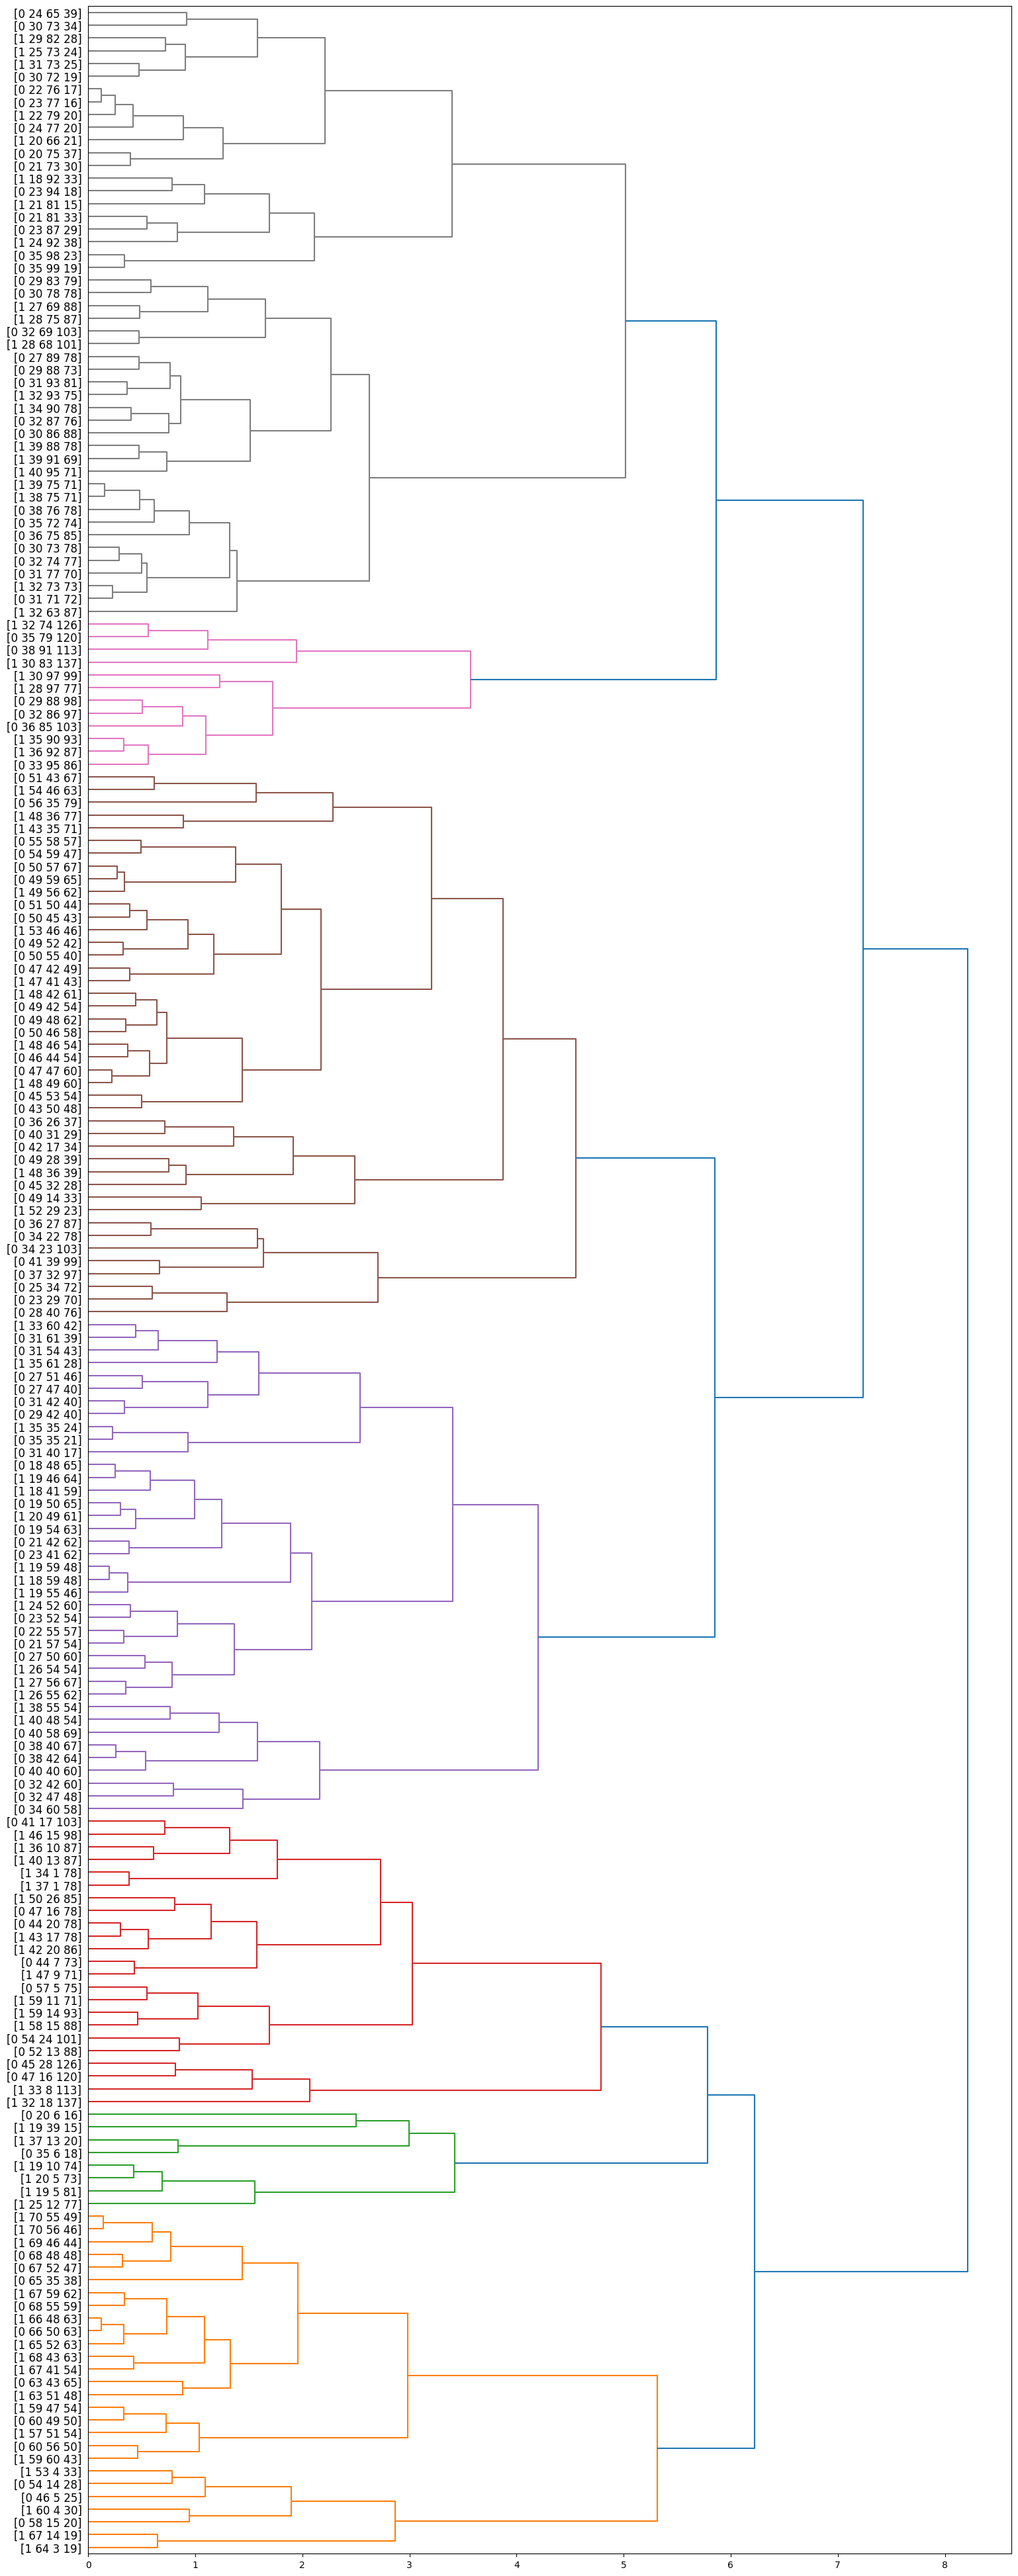

In [20]:
def llf(data):
    gender = data['Gender']
    age = int(float(data['Age']))
    spending_score = int(float(data['Spending Score (1-100)']))
    annual_income = int(float(data['Annual Income (k$)']))
    return f'[{gender} {age} {spending_score} {annual_income}]'

fig = plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_label_func=lambda id: llf(dataframe.iloc[id]), leaf_rotation=0, leaf_font_size=12, orientation='right')

#Male == 1
#Female == 0